In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
## For data manupilation
import numpy as np
import pandas as pd
# For os
#import os
# remove warning
import warnings
warnings.filterwarnings("ignore")

In [3]:
#os.chdir("D:\\data analyst data\\download data\\Mall Customer Segmentation Data")
#os.listdir()


In [4]:
df = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head() 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.isnull().sum() # checking if there is any null value 

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df.rename(columns= {'Annual Income (k$)' : 'Annual_Income', 'Spending Score (1-100)' : 'Spending_Score'}, inplace = True)

In [7]:
df.drop('CustomerID', axis = 1 ,inplace = True)

In [8]:
df.dtypes # checking data type 

Gender            object
Age                int64
Annual_Income      int64
Spending_Score     int64
dtype: object

In [9]:
df.shape #checking shape of data 

(200, 4)

In [10]:
df.columns.values #checking columns 

array(['Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype=object)

In [11]:
# For creating colormaps
import matplotlib.pyplot as plt
import seaborn as sns
# for clustering 
from sklearn.cluster import KMeans
import time  # Measuring process time
from sklearn.preprocessing import StandardScaler #  For data processing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as dt

In [12]:
np.min(df.Age), np.max(df.Age)

(18, 70)

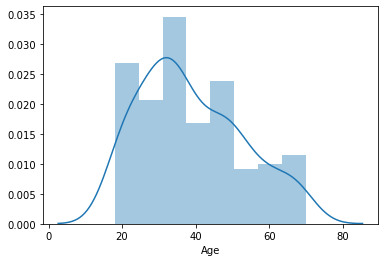

In [13]:
sns.distplot(df.Age) # diagrams 

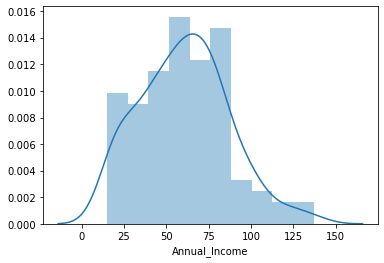

In [14]:
sns.distplot(df.Annual_Income)

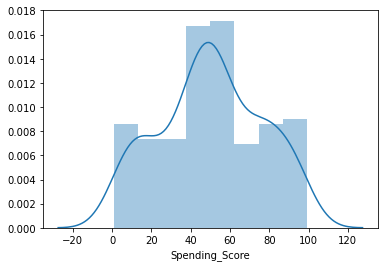

In [15]:
sns.distplot(df.Spending_Score)

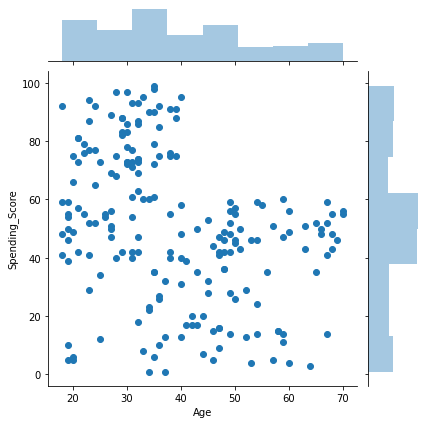

In [16]:
sns.jointplot(df.Age, df.Spending_Score)

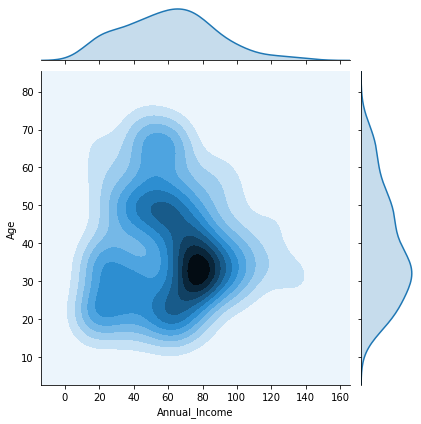

In [17]:
sns.jointplot(df.Annual_Income, df.Age , kind="kde")

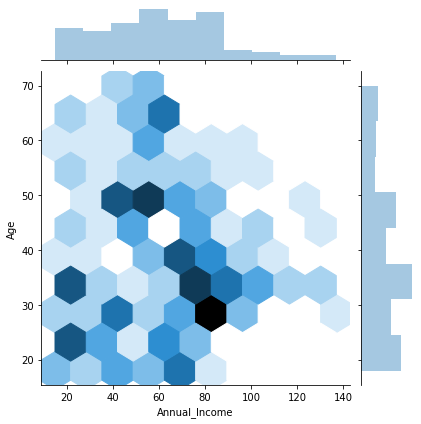

In [18]:
sns.jointplot(df.Annual_Income, df.Age , kind="hex")

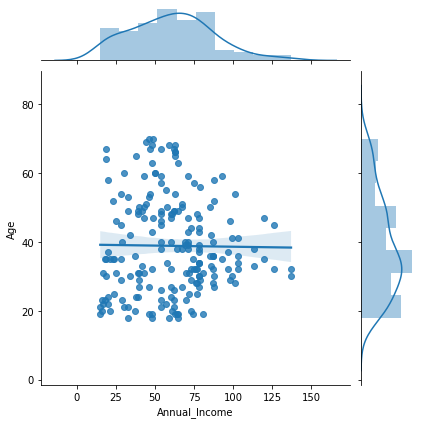

In [19]:
sns.jointplot(df.Annual_Income, df.Age , kind="reg")

In [20]:
cust_group = df.groupby(['Gender','Age']).sum().reset_index()
cust_group

,Gender,Age,Annual_Income,Spending_Score
0,Female,18,65,48
1,Female,19,128,104
2,Female,20,53,81
3,Female,21,179,253
4,Female,22,74,131
...,...,...,...,...
82,Male,66,63,48
83,Male,67,135,114
84,Male,68,63,43
85,Male,69,44,46


In [21]:
df['Annual_Income'].min()

15

In [22]:
df['Annual_Income'].max()

137

In [23]:
df['Annual_Income_cat'] = pd.cut(
                       df['Annual_Income'],
                       bins = 3,
                       labels= ['low', 'medium','high']
                      )
df

,Gender,Age,Annual_Income,Spending_Score,Annual_Income_cat
0,Male,19,15,39,low
1,Male,21,15,81,low
2,Female,20,16,6,low
3,Female,23,16,77,low
4,Female,31,17,40,low
...,...,...,...,...,...
195,Female,35,120,79,high
196,Female,45,126,28,high
197,Male,32,126,74,high
198,Male,32,137,18,high


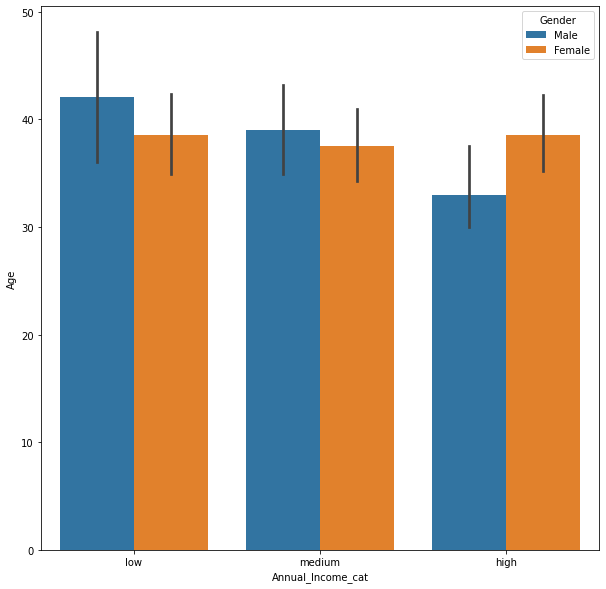

In [24]:
plt.figure(1 , figsize = (10 , 10))
sns.barplot(x = 'Annual_Income_cat', y = 'Age',hue = 'Gender', data = df, )

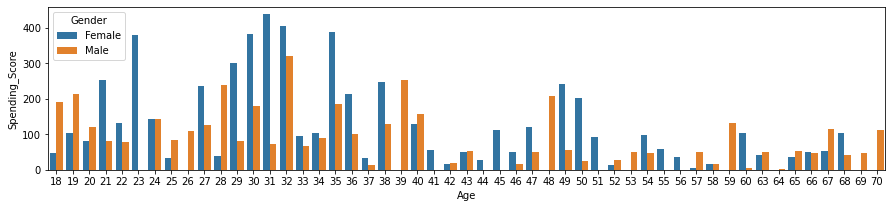

In [25]:
plt.figure(figsize=(15,3))
sns.barplot(data=cust_group,x='Age',y='Spending_Score',hue='Gender')

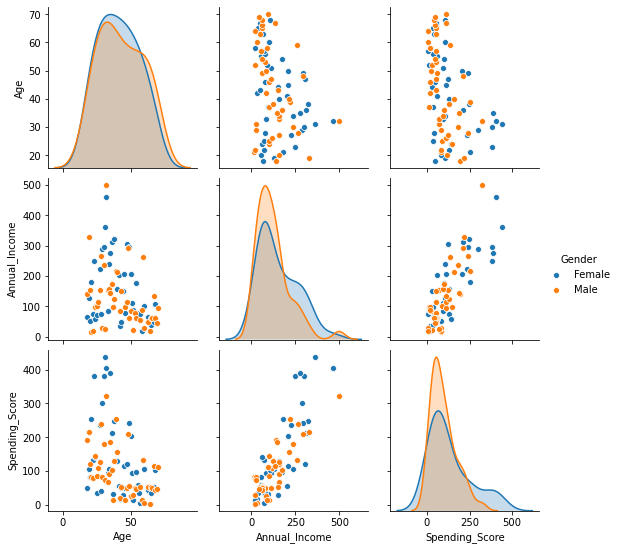

In [26]:
sns.pairplot(data=cust_group, hue='Gender')

In [27]:
df.drop(columns=['Annual_Income_cat'],inplace= True)  #Dropping columns not needed
df


,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [28]:
from sklearn.preprocessing import LabelEncoder as le
enc=le()

In [29]:
df['Gender']=enc.fit_transform(df['Gender'])
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [30]:
find_cls=[]
for i in range(1,15):
    kmean = KMeans(n_clusters=i)
    kmean.fit(df)
    find_cls.append(kmean.inertia_)


In [31]:
find_cls

[308862.06000000006,
 212889.44245524294,
 143391.59236035674,
 104414.67534220174,
 75399.61541401486,
 58348.64136331505,
 51132.70321257687,
 44355.31351771352,
 41153.34356060605,
 37256.71946084511,
 34999.11966366966,
 32442.532530687713,
 30240.101643766855,
 27948.994181961825]

<function matplotlib.pyplot.show(*args, **kw)>

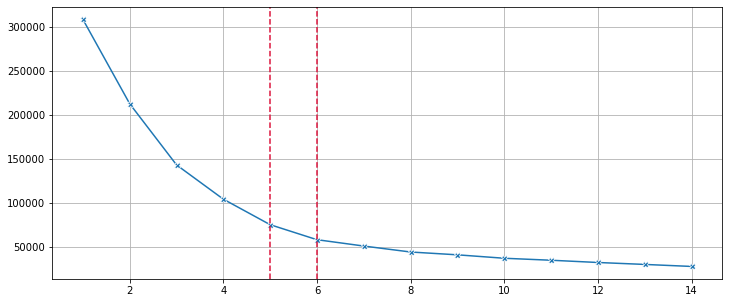

In [32]:
fig, axs = plt.subplots(figsize=(12,5))
sns.lineplot(range(1,15),find_cls, ax=axs,marker='X')
axs.axvline(5, ls="--", c="crimson") # CRIMSON is color, ls - line style
axs.axvline(6, ls="--", c="crimson")
plt.grid() #  square lines in back ground
plt.show

In [33]:
kmean=KMeans(n_clusters=5) # we found that best clusters are 5
kmean.fit(df)

KMeans(n_clusters=5)

In [34]:
kmean.inertia_

75399.61541401486

In [35]:
kmean.cluster_centers_

array([[ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739],
       [ 0.41772152, 43.08860759, 55.29113924, 49.56962025],
       [ 0.39130435, 45.2173913 , 26.30434783, 20.91304348]])

In [36]:
clust_centers=kmean.cluster_centers_

In [37]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [38]:
kmean.labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 0, 3, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [39]:
df['center_cluster']=kmean.labels_
df

,Gender,Age,Annual_Income,Spending_Score,center_cluster
0,1,19,15,39,4
1,1,21,15,81,2
2,0,20,16,6,4
3,0,23,16,77,2
4,0,31,17,40,4
...,...,...,...,...,...
195,0,35,120,79,0
196,0,45,126,28,1
197,1,32,126,74,0
198,1,32,137,18,1


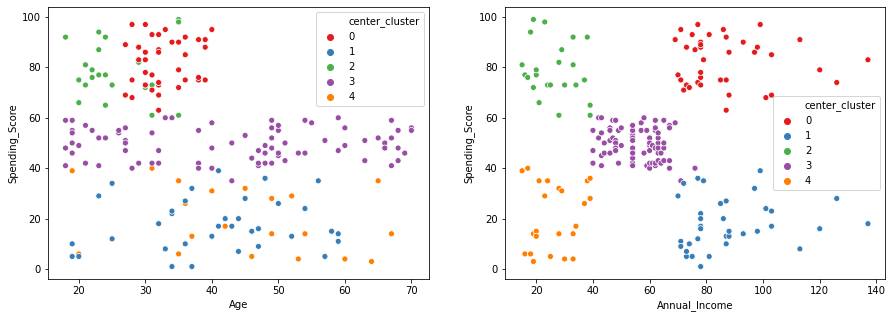

In [40]:
fig,(ax1,ax2)=plt.subplots(nrows=1, ncols=2,figsize=(15,5))
sns.scatterplot(data = df, x = 'Age', y = 'Spending_Score', ax=ax1, hue = 'center_cluster',palette='Set1')  # good color use palette =1
sns.scatterplot(data = df, x='Annual_Income', y ='Spending_Score', ax=ax2, hue='center_cluster',palette='Set1')

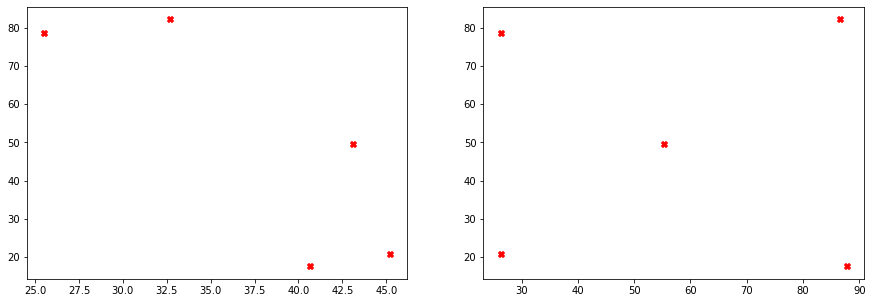

In [41]:
fig,(ax1,ax2)=plt.subplots(nrows=1, ncols=2,figsize=(15,5))

ax1.scatter(kmean.cluster_centers_[:,1], kmean.cluster_centers_[:,3],marker='X',color='red')      
ax2.scatter(kmean.cluster_centers_[:,2], kmean.cluster_centers_[:,3],marker='X',color='red')